<center><font size=8>Hands-on - Optimizing Neural Networks</font></center>

## Data Description

- The MNIST (Modified National Institute of Standards and Technology) dataset is one of the most popular datasets used in machine learning and deep learning

- It contains 70,000 handwritten images of the digits from 0 to 9

- Each image is of 28x28 dimension and is represented using pixels values between 0 and 255, where
    - 0 stands for black
    - 255 stands for white

## Installing and importing the necessary libraries

In [ ]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.23.5 pandas==1.5.3 -q --user --no-warn-script-location

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 64.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.


In [ ]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.

from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.

import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

## Loading the data

In [ ]:
#Loading the dataset from tensorflow datasets.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Data Overview

In [ ]:
#Printing the shape of the data.
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Let's check the images for different digits.**

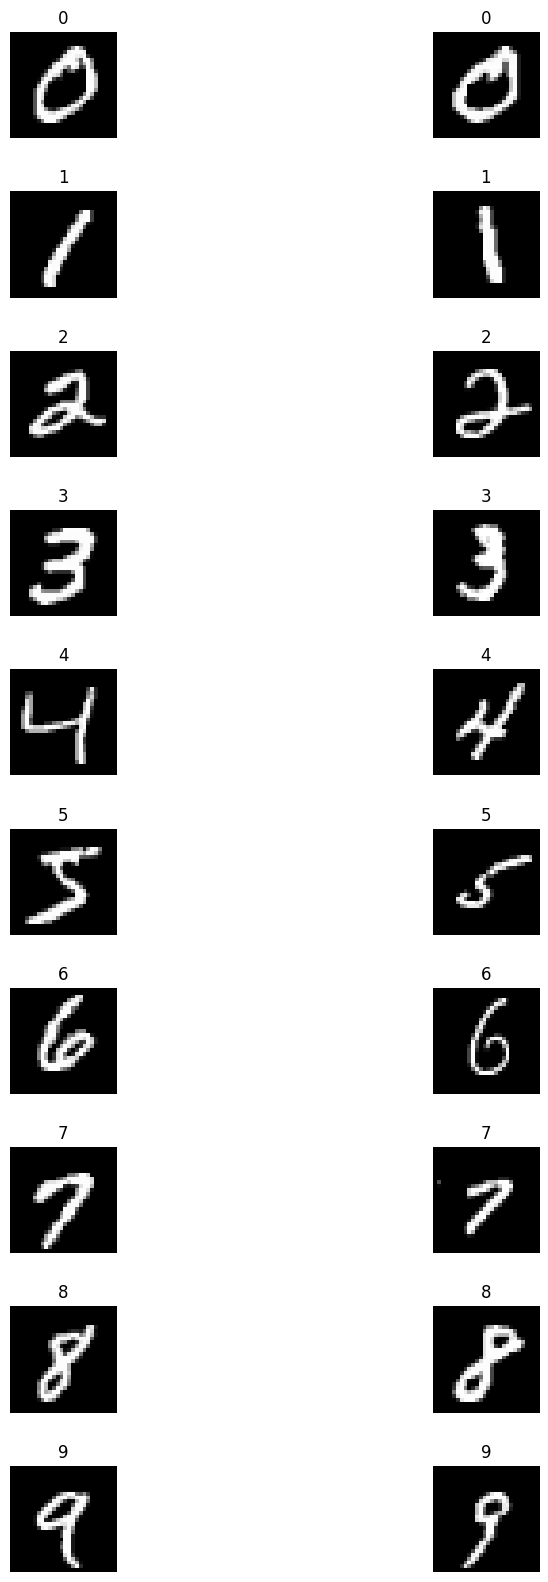

In [ ]:
f, axarr = plt.subplots(10,2,figsize=(10, 20)) #Grid of size 10*20, with 10 rows and 2 columns
for i in range(10): #For each digit
    images = x_train[y_train==i] #Filtering all the images based on the digit.
    axarr[i,0].imshow(images[0],cmap="gray") #Plotting the first one.
    axarr[i,1].imshow(images[1],cmap="gray") #Plotting the second one.
    axarr[i,0].axis('off')  # Hide axes
    axarr[i,1].axis('off')  # Hide axes
    axarr[i,0].set_title(str(i)) #Setting the title as the label of the digit.
    axarr[i,1].set_title(str(i)) #Setting the title as the label of the digit.

plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots
plt.show() #Displaying the plot.

**Let's check the distribution of images across different classes.**

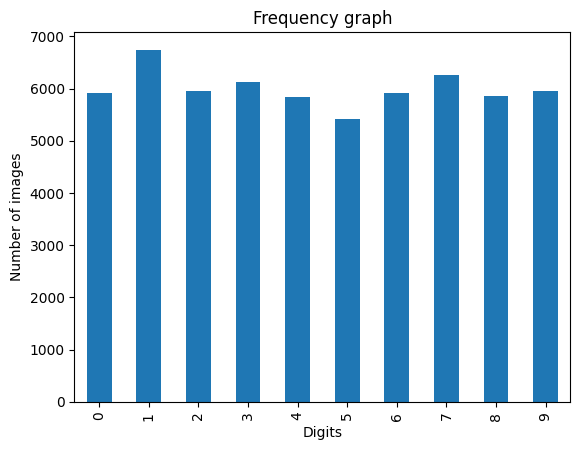

In [ ]:
# frequency plot of the dependent variable in the training dataset
(pd.Series(y_train).value_counts())[[0,1,2,3,4,5,6,7,8,9]].plot.bar()
plt.title("Frequency graph") #Setting the title
plt.xlabel("Digits") #Defining the label for the x-axis
plt.ylabel("Number of images") #Defining the label for the y-axis.
plt.show() #Displaying the plot.

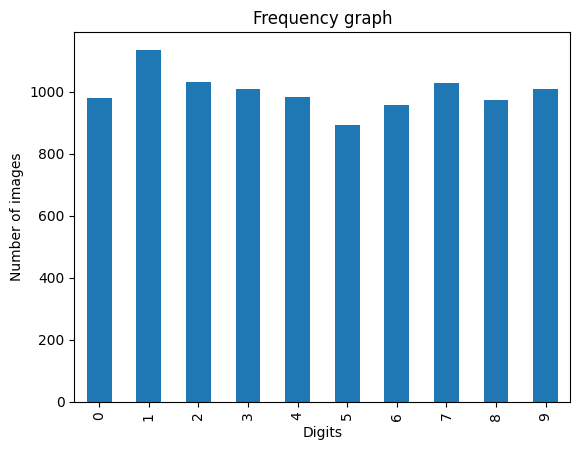

In [ ]:
# frequency plot of the dependent variable in the test dataset
(pd.Series(y_test).value_counts())[[0,1,2,3,4,5,6,7,8,9]].plot.bar()
plt.title("Frequency graph") #Setting the title
plt.xlabel("Digits") #Defining the label for the x-axis
plt.ylabel("Number of images") #Defining the label for the y-axis.
plt.show() #Displaying the plot.

## Data Preprocessing

### Data Preparation for Modeling

In [ ]:
# Splitting the training dataset in the ratio 5:1 for train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1-(5/6), random_state=42,stratify=y_train)

In [ ]:
#Printing the shape of the dataset.
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)


### Data Scaling

In [ ]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),x_test.max(),x_val.max())
print(x_train.min(),x_test.min(),x_val.min())

255 255 255
0 0 0


In [ ]:
# Normalizing the dataset
x_train, x_val, x_test = x_train.astype("float32")/(255), x_val.astype("float32")/(255), x_test.astype("float32")/(255)

In [ ]:
#Printing the maximum value and the minimum value of the independent variable.
print(x_train.max(),x_test.max(),x_val.max())
print(x_train.min(),x_test.min(),x_val.min())

1.0 1.0 1.0
0.0 0.0 0.0


- Previously, the range was $[0,255]$
- Now, the range after normalizing is $[0,1]$

### Reshaping the input

We need to reshape the image data from $(n,h,w)$ to $(n,h*w)$, where

- $n$ = number of images in the dataset
- $h$ = height of the image
- $w$ = width of the image

For example, image data of dimension $(50000,26,26)$ is transformed to $(50000,26*26)$, i.e., $(50000,784)$.

In [ ]:
#Reshaping the image data
x_train = x_train.reshape(x_train.shape[0],-1)
x_val = x_val.reshape(x_val.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

In [ ]:
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "validation samples")
print(x_test.shape[0], "test samples")

50000 train samples
10000 validation samples
10000 test samples


### Encoding the target variable

In [ ]:
# specifying the number of classes
num_classes = 10

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [ ]:
#Displaying the updated class labels
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Each row in the matrix is now a one-hot encoded vector of 10 dimensions
- The value will be 1 for the entry (dimension) corresponding true class and 0 elsewhere

### Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

We'll create a dataframe to store the results from all the models we build

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train accuracy","validation accuracy","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

## Model Building

We'll be using the same batch size and epochs throughout, so let's define two variables for the same

In [ ]:
batch_size = 32
epochs = 50

### Model 0

We'll start out with a baseline model having the following configuration:

- 1 input, 2 hidden, 1 output layers
- relu and tanh activations for the first and second hidden layer respectively
- Stochastic Gradient Descent (SGD)

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6536 - accuracy: 0.8350 - val_loss: 0.3665 - val_accuracy: 0.9001
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3155 - accuracy: 0.9114 - val_loss: 0.2869 - val_accuracy: 0.9187
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9258 - val_loss: 0.2493 - val_accuracy: 0.9305
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2191 - accuracy: 0.9374 - val_loss: 0.2188 - val_accuracy: 0.9381
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1914 - accuracy: 0.9451 - val_loss: 0.1974 - val_accuracy: 0.9437
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1698 - accuracy: 0.9505 - val_loss: 0.1814 - val_accuracy: 0.9477
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1528 - accuracy: 0.9556 - val_loss: 0.1682 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  202.60414838790894


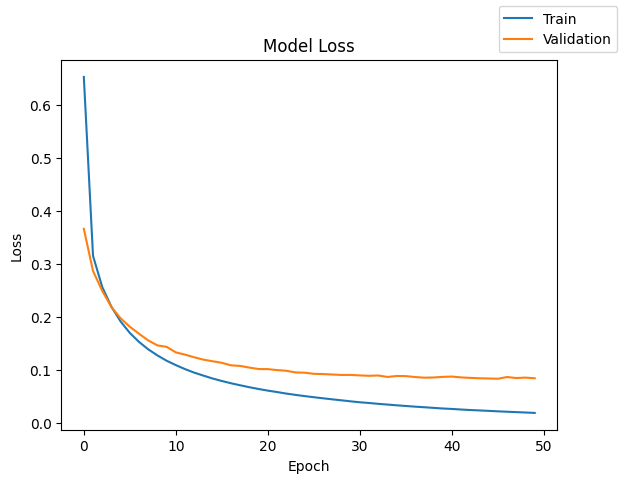

In [ ]:
plot(history,'loss')

- There's a steep decrease in the loss from epoch 1 to 2.
- After the 2nd epoch, the validation loss is always more than the training loss and starts to diverge.
- Thereafter, the steepness is reduced, i.e., the loss decreases at a reduced pace.

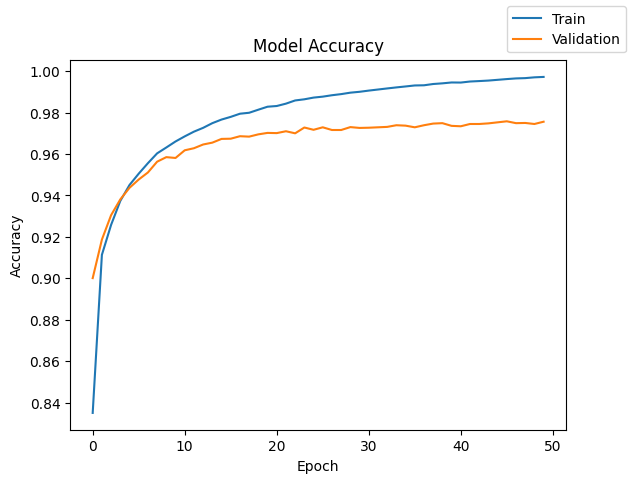

In [ ]:
plot(history,'accuracy')

- We observe the exact opposite scenario for accuracy compared to loss.

In [ ]:
results.loc[0] = [2,[128,64],["relu","tanh"],50,32,"sgd",[0.001, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.6


- The results are good with SGD but in the initial few epochs, it takes some time to improve.
- One reason could be that we are near a local minimum, and hence the magnitude of the weight updates is less.
- In these regions, we can introduce some momentum to increase the magnitude of the weight updates.
    - The momentum term accelerates the optimization process by adding a fraction of the previous update to the current update
    - This will enable faster convergence and reduced oscillations in the loss across epochs

**Let's try using the SGD optimizer with momentum.**

### Model 1

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mom = 0.9    # defining the momentum value to be used
optimizer = keras.optimizers.SGD(momentum=mom)    # defining the SGD optimizer with a specific momentum

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2874 - accuracy: 0.9156 - val_loss: 0.1598 - val_accuracy: 0.9523
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1261 - accuracy: 0.9616 - val_loss: 0.1254 - val_accuracy: 0.9632
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0871 - accuracy: 0.9743 - val_loss: 0.1088 - val_accuracy: 0.9672
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9801 - val_loss: 0.0977 - val_accuracy: 0.9719
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0534 - accuracy: 0.9837 - val_loss: 0.0923 - val_accuracy: 0.9725
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0915 - val_accuracy: 0.9727
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0860 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  202.47851371765137


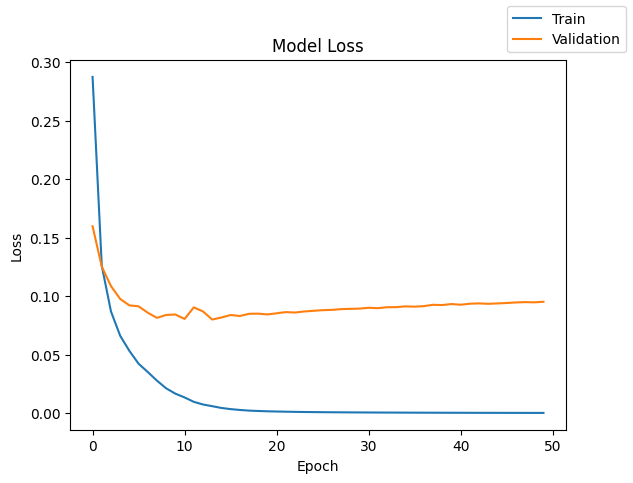

In [ ]:
plot(history,'loss')

- There's a steep decrease in the loss from epoch 1 to epoch 5.
- In the case of SGD without momentum, the steepness was present only until the second epoch. Here, it extends until the fifth epoch. This is due to the momentum gained.
- After the initial few epochs, the validation loss is always more than the training loss
    - In fact, the valdation loss starts to increase while the training loss continues to decrease till it becomes close to zero

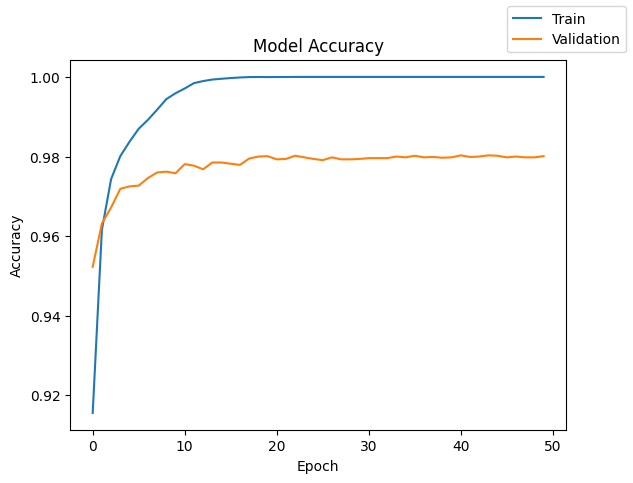

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[1] = [2,[128,64],["relu","tanh"],50,32,"sgd with momentum",[0.001,mom],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48


- Since the momentum defined is a constant, even after nearing the minimum, we still proceed with the same momentum.
- This may be resulting in overshooting the minimum.

Let's decrease the momentum and see the impact.

### Model 2

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mom = 0.4
optimizer = keras.optimizers.SGD(momentum=mom)
model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.5421 - accuracy: 0.8577 - val_loss: 0.3078 - val_accuracy: 0.9139
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2609 - accuracy: 0.9248 - val_loss: 0.2353 - val_accuracy: 0.9334
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2056 - accuracy: 0.9398 - val_loss: 0.2008 - val_accuracy: 0.9424
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1719 - accuracy: 0.9495 - val_loss: 0.1716 - val_accuracy: 0.9498
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1477 - accuracy: 0.9574 - val_loss: 0.1552 - val_accuracy: 0.9546
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1293 - accuracy: 0.9627 - val_loss: 0.1418 - val_accuracy: 0.9578
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1142 - accuracy: 0.9669 - val_loss: 0.1311 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  168.6250867843628


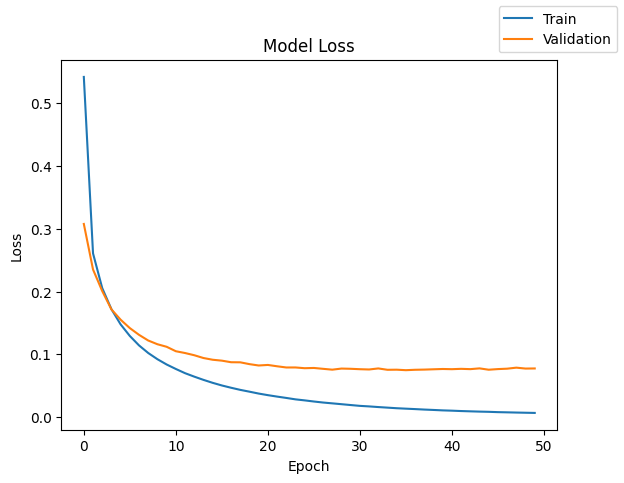

In [ ]:
plot(history,'loss')

- As we decreased the momentum, the steepness decreased.
- Additionally, the gap between the validation loss curve and the train loss curve has also decreased.

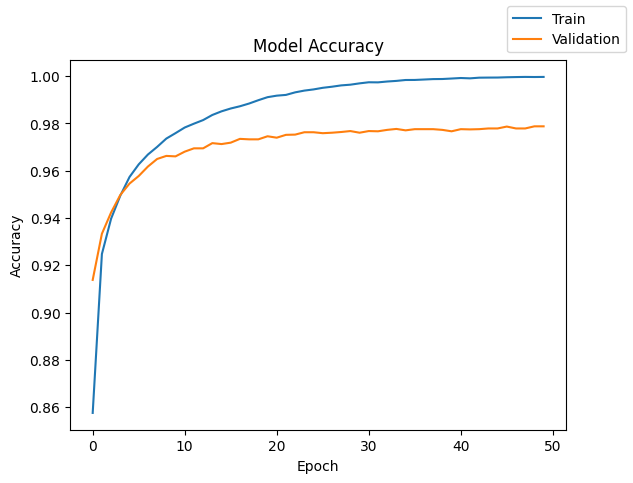

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[2] = [2,[128,64],["relu","tanh"],50,32,"sgd with momentum",[0.001,mom],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63


- As expected, decreasing the momentum has helped in this case.
- The convergence has improved and is also smoother.

- But decreasing the momentum has also reduced the accuracy values on both train and test.

- Reducing the momentum is not decreasing the performance; rather, the learning is slow here.

- We can also change the learning rate to see the effect on model performance.
- We have been using the default learning rate of 0.001 so far.

Let's try reducing the learning rate of the model.

### Model 3

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lr = 1e-4    # defining the learning rate; 1e-4 is equal to 0.0001
mom = 0.4
optimizers = keras.optimizers.SGD(momentum=mom,learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizers, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2290 - accuracy: 0.2079 - val_loss: 2.0900 - val_accuracy: 0.3380
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9727 - accuracy: 0.4303 - val_loss: 1.8639 - val_accuracy: 0.5006
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7631 - accuracy: 0.5645 - val_loss: 1.6695 - val_accuracy: 0.6176
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5816 - accuracy: 0.6539 - val_loss: 1.5014 - val_accuracy: 0.6899
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4256 - accuracy: 0.7076 - val_loss: 1.3579 - val_accuracy: 0.7247
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2931 - accuracy: 0.7407 - val_loss: 1.2363 - val_accuracy: 0.7541
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1812 - accuracy: 0.7648 - val_loss: 1.1337 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  170.59418654441833


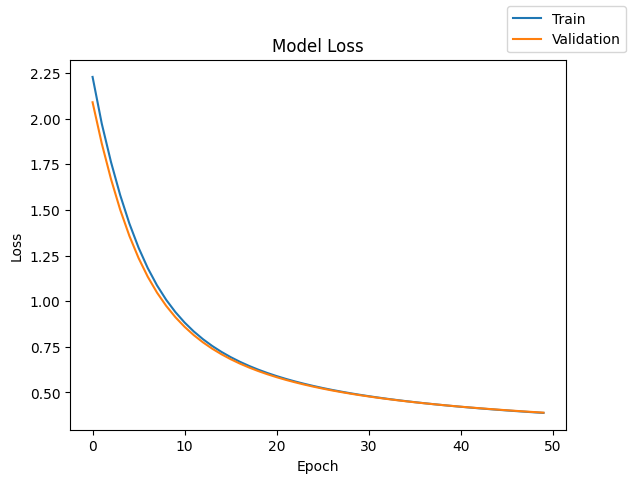

In [ ]:
plot(history,'loss')

- There's a steep decrease in the loss from epoch 1 to epoch 5.
- The validation loss curve is very close to the training loss curve after we reduced the learning rate.


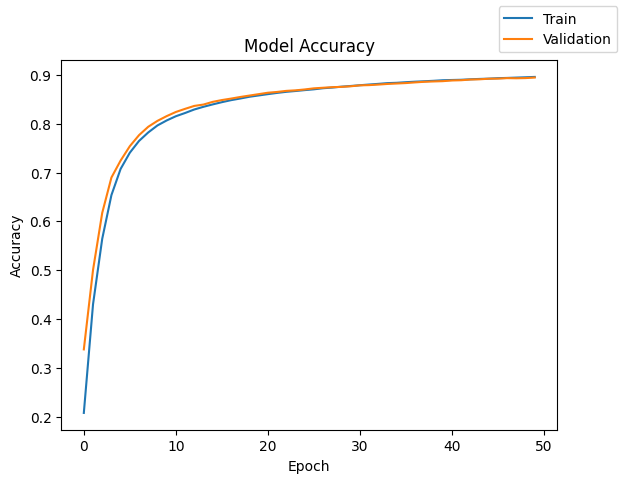

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[3] = [2,[128,64],["relu","tanh"],50,32,"sgd with momentum",[lr, mom],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.387949,0.389443,0.89588,0.8946,170.59


- Decreasing the learning rate has reduced the rate of learning, but the train and validation accuracy are very close.
  - This shows that the chances of overfitting are very low

Let's further decrease the learning rate.

### Model 4

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lr = 1e-5
mom = 0.4
optimizer = keras.optimizers.SGD(momentum=mom, learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.4555 - accuracy: 0.1174 - val_loss: 2.4279 - val_accuracy: 0.1279
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.4035 - accuracy: 0.1348 - val_loss: 2.3801 - val_accuracy: 0.1440
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3578 - accuracy: 0.1521 - val_loss: 2.3378 - val_accuracy: 0.1629
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3170 - accuracy: 0.1688 - val_loss: 2.2996 - val_accuracy: 0.1799
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 2.2800 - accuracy: 0.1848 - val_loss: 2.2647 - val_accuracy: 0.1938
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2459 - accuracy: 0.2005 - val_loss: 2.2323 - val_accuracy: 0.2088
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2141 - accuracy: 0.2154 - val_loss: 2.2021 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  202.39322304725647


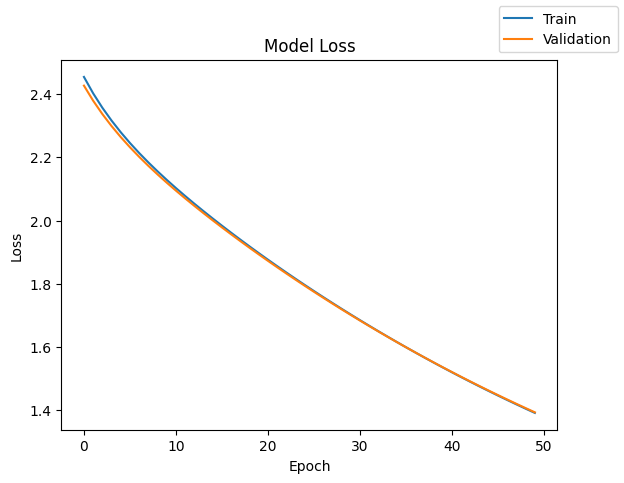

In [ ]:
plot(history,'loss')

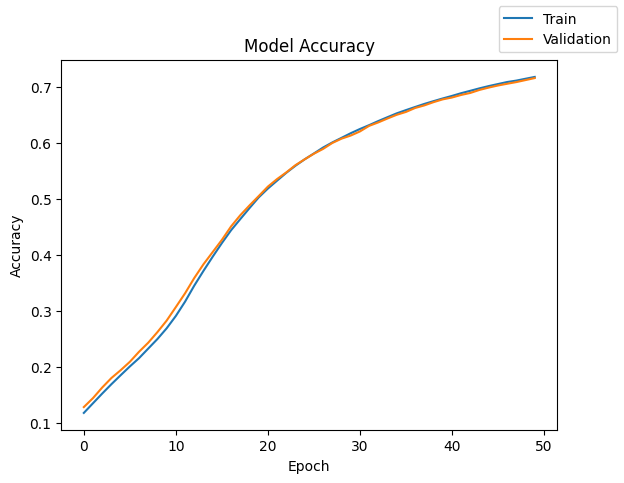

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[4] = [2,[128,64],["relu","tanh"],50,32,"sgd with momentum",[lr,mom],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.387949,0.389443,0.89588,0.8946,170.59
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.389483,1.391400,0.71824,0.7162,202.39


- While the difference between train and validation accuracies is very low, reducing the learning rate has resulted in reduced performance.
- We need to let the model run for more epochs to try to obtain a performance similar to before.
    - This would require more time

- These empirical results show that a carefully chosen set of values for learning rate and momentum is very essential in obtaining a good overall performance.

- It might not always be feasible to set the learning rate and momentum manually
    - Requires a lot of trial and error to get a good set of values

- ***Is there a way to set them better?***

- We can use the **Adam optimizer** for the same.
    - Adam (Adaptive Moment Estimation) adjusts the learning rate in an adaptive manner
    - This enables it to converge faster and more reliably compared to SGD with momentum, especially in scenarios with large datasets and complex optimization landscapes

**Let's try out the Adam optimizer.**

### Model 5

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.Adam()

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2462 - accuracy: 0.9295 - val_loss: 0.1352 - val_accuracy: 0.9598
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0996 - accuracy: 0.9698 - val_loss: 0.1077 - val_accuracy: 0.9673
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0675 - accuracy: 0.9792 - val_loss: 0.1051 - val_accuracy: 0.9675
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0495 - accuracy: 0.9839 - val_loss: 0.0940 - val_accuracy: 0.9724
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0922 - val_accuracy: 0.9718
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0988 - val_accuracy: 0.9714
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0927 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  202.55615186691284


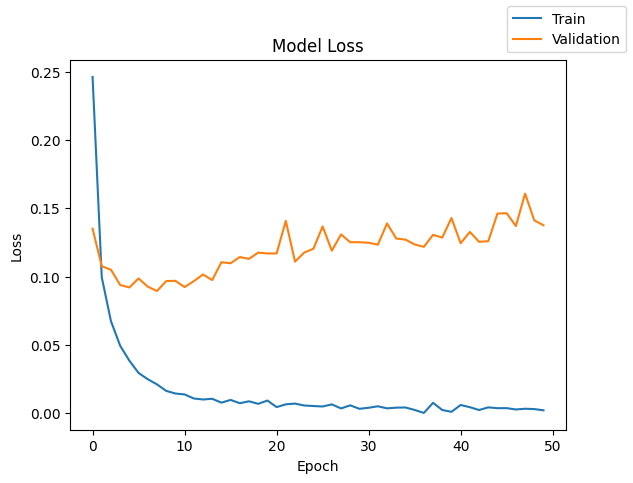

In [ ]:
plot(history,'loss')

- After the initial few epochs, the validation loss is oscillating.
    - This indicates that the model is struggling to find the local minima

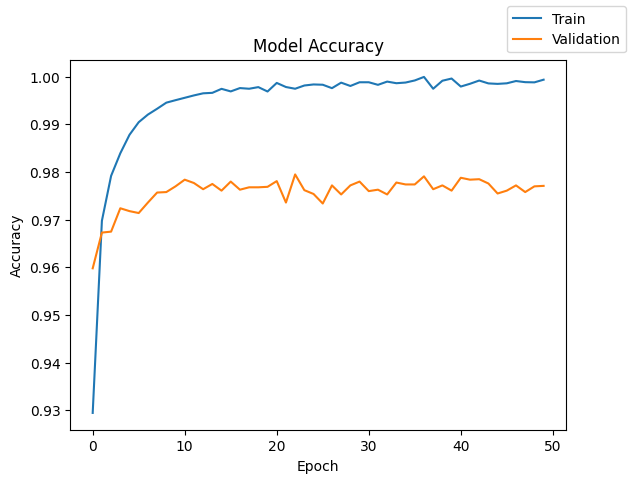

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[5] = [2,[128,64],["relu","tanh"],50,32,"adam",[0.001, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.387949,0.389443,0.89588,0.8946,170.59
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.389483,1.391400,0.71824,0.7162,202.39
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.002319,0.137696,0.99938,0.9771,202.56


- We've used the default learning rate of 0.001 here.
- Even though the Adam algorithm adaptively learns the learning rate, it is still dependent on the initial value of the learning rate.

Let's try decreasing the learning rate that the optimizer starts out with.

### Model 6

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6361 - accuracy: 0.8434 - val_loss: 0.3172 - val_accuracy: 0.9148
Epoch 2/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2613 - accuracy: 0.9288 - val_loss: 0.2311 - val_accuracy: 0.9353
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1986 - accuracy: 0.9444 - val_loss: 0.1925 - val_accuracy: 0.9450
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1637 - accuracy: 0.9530 - val_loss: 0.1675 - val_accuracy: 0.9507
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1392 - accuracy: 0.9599 - val_loss: 0.1500 - val_accuracy: 0.9562
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1210 - accuracy: 0.9649 - val_loss: 0.1380 - val_accuracy: 0.9591
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1065 - accuracy: 0.9690 - val_loss: 0.1274 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  202.54535841941833


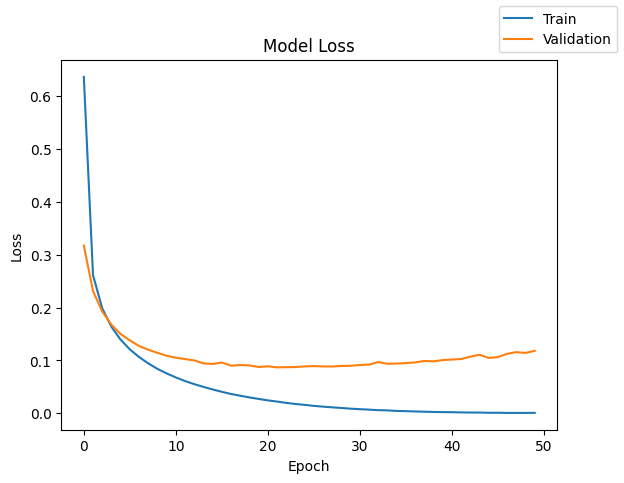

In [ ]:
plot(history,'loss')

- The oscilations of the validation loss have reduced now.

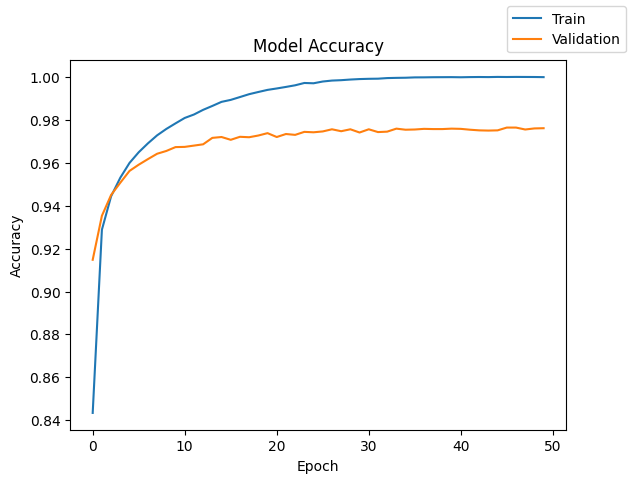

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[6] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.387949,0.389443,0.89588,0.8946,170.59
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.389483,1.391400,0.71824,0.7162,202.39
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.002319,0.137696,0.99938,0.9771,202.56
6,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,-,0.001015,0.118252,0.99990,0.9761,202.55


Let's further decrease the learning rate to reduce the oscillations.

### Model 7

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lr = 1e-5
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.7488 - accuracy: 0.5486 - val_loss: 1.2374 - val_accuracy: 0.7833
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9564 - accuracy: 0.8241 - val_loss: 0.7653 - val_accuracy: 0.8457
Epoch 3/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.6533 - accuracy: 0.8632 - val_loss: 0.5773 - val_accuracy: 0.8734
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5185 - accuracy: 0.8814 - val_loss: 0.4815 - val_accuracy: 0.8835
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4441 - accuracy: 0.8926 - val_loss: 0.4242 - val_accuracy: 0.8947
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3970 - accuracy: 0.8996 - val_loss: 0.3862 - val_accuracy: 0.9002
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3639 - accuracy: 0.9053 - val_loss: 0.3577 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  262.5485746860504


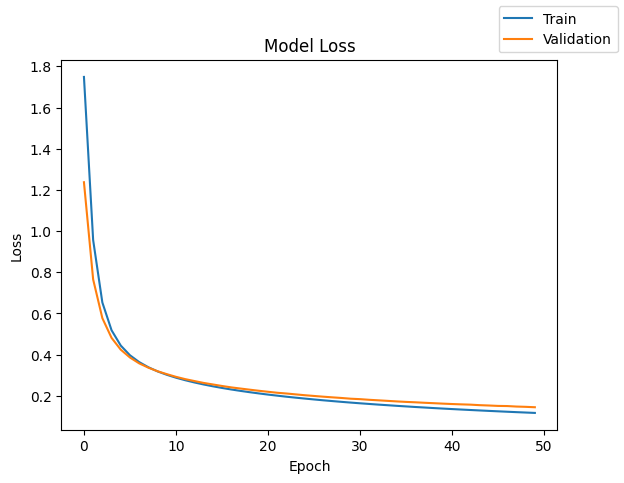

In [ ]:
plot(history,'loss')

- The loss curves are smoothly decreasing now.

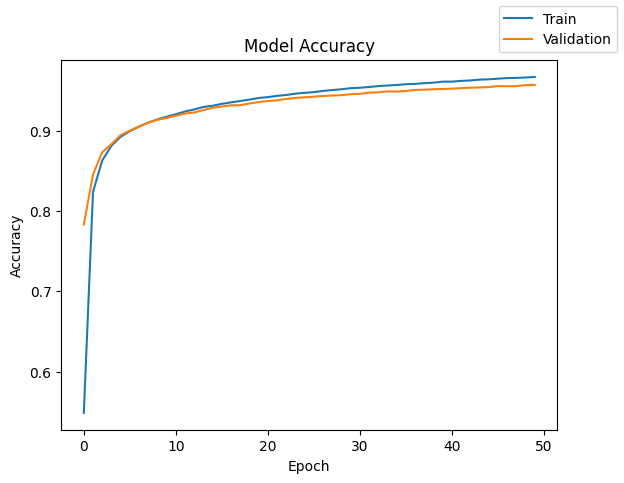

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[7] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.387949,0.389443,0.89588,0.8946,170.59
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.389483,1.391400,0.71824,0.7162,202.39
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.002319,0.137696,0.99938,0.9771,202.56
6,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,-,0.001015,0.118252,0.99990,0.9761,202.55
7,2,"[128, 64]","[relu, tanh]",50,32,adam,"[1e-05, -]",xavier,-,0.116973,0.144575,0.96724,0.9573,262.55


- As observed previously with SGD with momentum, reducing the learning rate further has slowed down learning
    - However, the decrease in performance due to a lower learning rate is not as large as it was in the case of SGD with momentum

- We'll stick with the learning rate of 1e-4 for now.

- Let's define a variable for the same.

In [ ]:
lr = 1e-4

- We observed that while reducing the learning rate resulted in a reduced difference between train and validation accuracies, it required a lot more time to run to yield desirable levels of performance.

- To reduce the difference between train and validation accuracies while retaining the desirable level of performance, one can use regularization techniques.

- One of the commonly used regularization techniques is dropout.

Let's try introducing dropout to perform regularization.

### Model 8

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# defining the dropout ratio
# 0.2 means 20% of the neurons will be switched off
dropout_rate = 0.2

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.7257 - accuracy: 0.8080 - val_loss: 0.3286 - val_accuracy: 0.9111
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3107 - accuracy: 0.9124 - val_loss: 0.2408 - val_accuracy: 0.9306
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2406 - accuracy: 0.9306 - val_loss: 0.2013 - val_accuracy: 0.9408
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2024 - accuracy: 0.9402 - val_loss: 0.1752 - val_accuracy: 0.9467
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1747 - accuracy: 0.9487 - val_loss: 0.1552 - val_accuracy: 0.9529
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1531 - accuracy: 0.9548 - val_loss: 0.1420 - val_accuracy: 0.9577
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1373 - accuracy: 0.9595 - val_loss: 0.1290 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  202.72216534614563


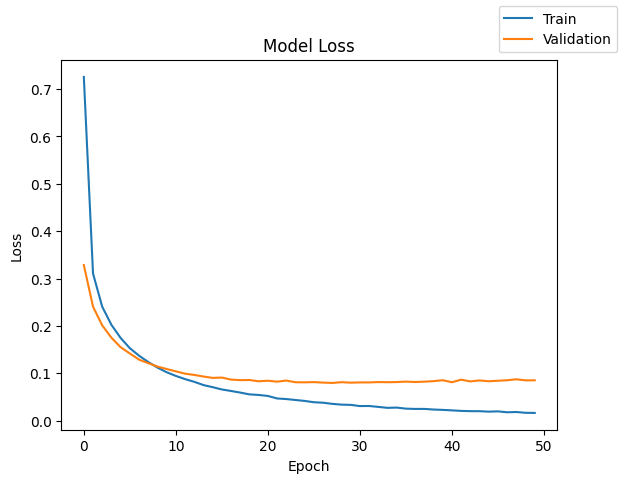

In [ ]:
plot(history,'loss')

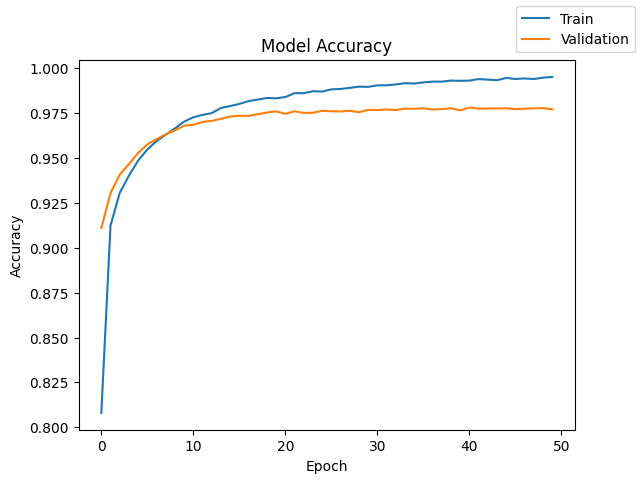

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[8] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","dropout (0.2)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.387949,0.389443,0.89588,0.8946,170.59
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.389483,1.391400,0.71824,0.7162,202.39
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.002319,0.137696,0.99938,0.9771,202.56
6,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,-,0.001015,0.118252,0.99990,0.9761,202.55
7,2,"[128, 64]","[relu, tanh]",50,32,adam,"[1e-05, -]",xavier,-,0.116973,0.144575,0.96724,0.9573,262.55
8,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,dropout (0.2),0.016497,0.085363,0.99526,0.9772,202.72


- A dropout rate of 0.2 doesn't yield very different results as the validation accuracy still falls within the range $[0.97,0.98]$.

Let's increase the dropout rate to observe its effect.

### Model 9

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
dropout_rate = 0.3

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.7540 - accuracy: 0.7971 - val_loss: 0.3376 - val_accuracy: 0.9085
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3401 - accuracy: 0.9032 - val_loss: 0.2449 - val_accuracy: 0.9300
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2643 - accuracy: 0.9233 - val_loss: 0.2029 - val_accuracy: 0.9414
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2218 - accuracy: 0.9354 - val_loss: 0.1781 - val_accuracy: 0.9474
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1923 - accuracy: 0.9434 - val_loss: 0.1574 - val_accuracy: 0.9528
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1722 - accuracy: 0.9498 - val_loss: 0.1441 - val_accuracy: 0.9572
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1581 - accuracy: 0.9530 - val_loss: 0.1340 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  183.2941770553589


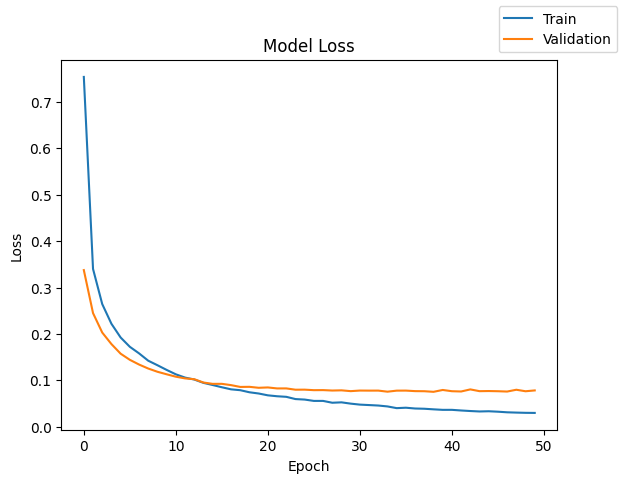

In [ ]:
plot(history,'loss')

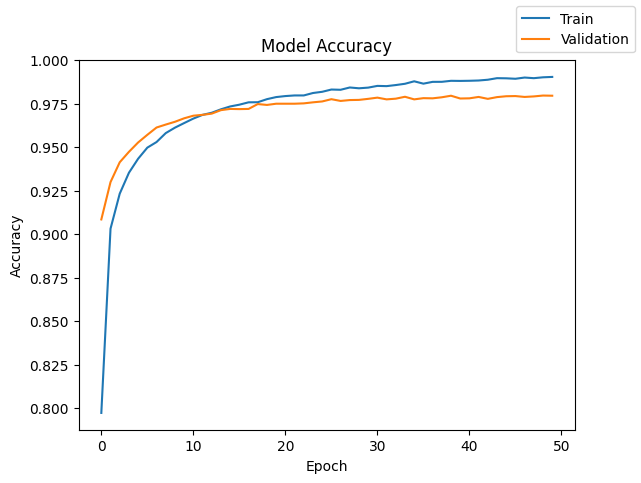

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[9] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","dropout (0.3)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.387949,0.389443,0.89588,0.8946,170.59
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.389483,1.391400,0.71824,0.7162,202.39
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.002319,0.137696,0.99938,0.9771,202.56
6,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,-,0.001015,0.118252,0.99990,0.9761,202.55
7,2,"[128, 64]","[relu, tanh]",50,32,adam,"[1e-05, -]",xavier,-,0.116973,0.144575,0.96724,0.9573,262.55
8,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,dropout (0.2),0.016497,0.085363,0.99526,0.9772,202.72
9,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,dropout (0.3),0.029679,0.078168,0.99052,0.9797,183.29


- Even though the results on the validation set haven't improved, the difference in the training and validation accuracy has reduced.

Let's increase the dropout rate further to observe its effect.

### Model 10

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
dropout_rate = 0.5

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8959 - accuracy: 0.7459 - val_loss: 0.3758 - val_accuracy: 0.8985
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4208 - accuracy: 0.8813 - val_loss: 0.2744 - val_accuracy: 0.9218
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3292 - accuracy: 0.9042 - val_loss: 0.2280 - val_accuracy: 0.9349
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2795 - accuracy: 0.9182 - val_loss: 0.2002 - val_accuracy: 0.9417
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2491 - accuracy: 0.9263 - val_loss: 0.1787 - val_accuracy: 0.9474
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2284 - accuracy: 0.9328 - val_loss: 0.1635 - val_accuracy: 0.9524
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2126 - accuracy: 0.9375 - val_loss: 0.1536 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  166.87057304382324


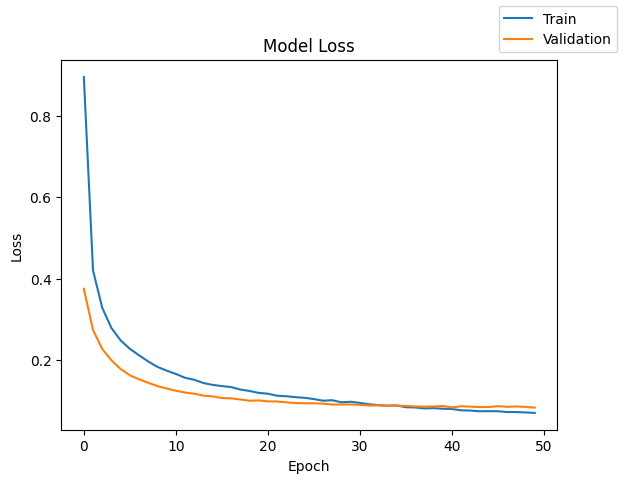

In [ ]:
plot(history,'loss')

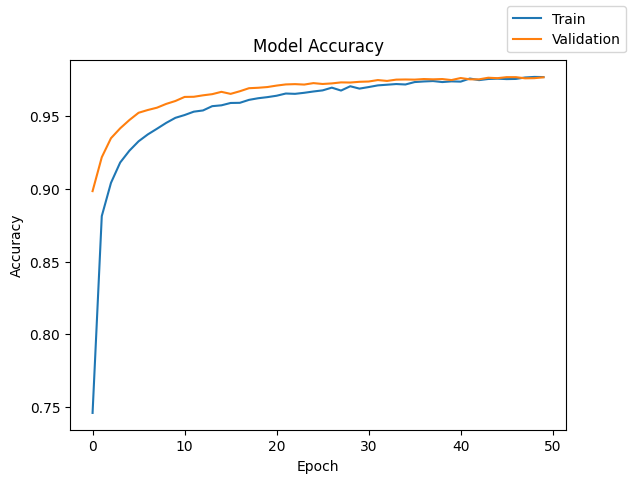

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[10] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr,"-"],"xavier","dropout (0.5)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.387949,0.389443,0.89588,0.8946,170.59
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.389483,1.391400,0.71824,0.7162,202.39
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.002319,0.137696,0.99938,0.9771,202.56
6,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,-,0.001015,0.118252,0.99990,0.9761,202.55
7,2,"[128, 64]","[relu, tanh]",50,32,adam,"[1e-05, -]",xavier,-,0.116973,0.144575,0.96724,0.9573,262.55
8,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,dropout (0.2),0.016497,0.085363,0.99526,0.9772,202.72
9,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,dropout (0.3),0.029679,0.078168,0.99052,0.9797,183.29


- While the performance of the model has decreased slightly on the training set, the difference in the training and validation accuracy has further reduced.
- Note that the time of execution is slightly lower than before
    - This is because a proportion of neurons were turned off

Let's try using a different regularization technique, Batch Normalization.

### Model 11

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(BatchNormalization())    # Adding a batch normalization layer
model_1.add(Dense(64,activation="tanh"))
model_1.add(BatchNormalization())
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 110154 (430.29 KB)
Trainable params: 10977

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 5s 2ms/step - loss: 0.5752 - accuracy: 0.8301 - val_loss: 0.2698 - val_accuracy: 0.9241
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2498 - accuracy: 0.9288 - val_loss: 0.1873 - val_accuracy: 0.9461
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1837 - accuracy: 0.9465 - val_loss: 0.1509 - val_accuracy: 0.9546
Epoch 4/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1452 - accuracy: 0.9571 - val_loss: 0.1302 - val_accuracy: 0.9607
Epoch 5/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1207 - accuracy: 0.9639 - val_loss: 0.1160 - val_accuracy: 0.9661
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1017 - accuracy: 0.9708 - val_loss: 0.1100 - val_accuracy: 0.9655
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0863 - accuracy: 0.9752 - val_loss: 0.1049 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  184.65569710731506


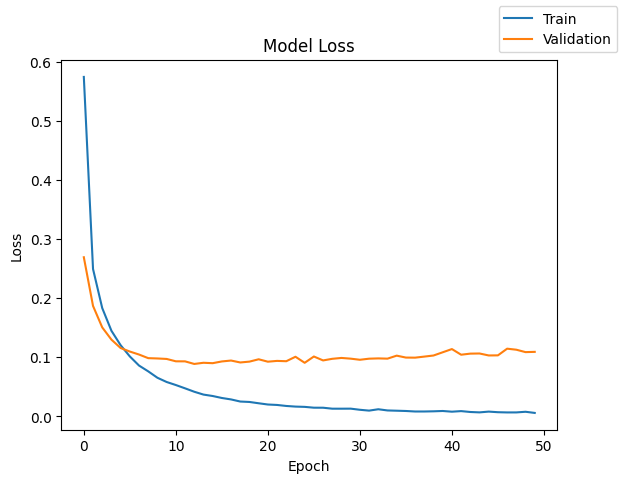

In [ ]:
plot(history,'loss')

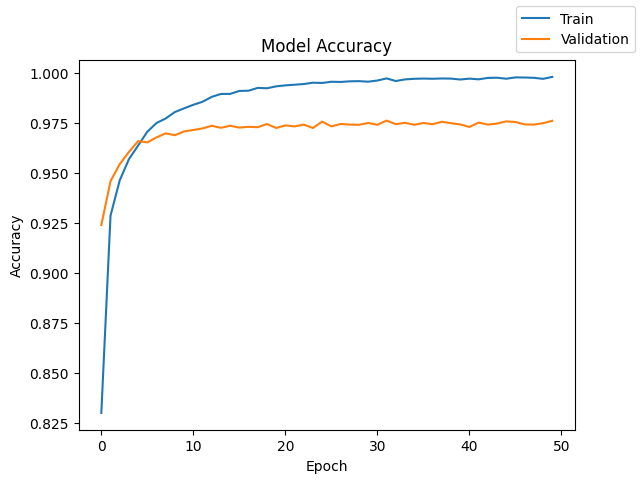

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[11] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","batch norm",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.387949,0.389443,0.89588,0.8946,170.59
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.389483,1.391400,0.71824,0.7162,202.39
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.002319,0.137696,0.99938,0.9771,202.56
6,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,-,0.001015,0.118252,0.99990,0.9761,202.55
7,2,"[128, 64]","[relu, tanh]",50,32,adam,"[1e-05, -]",xavier,-,0.116973,0.144575,0.96724,0.9573,262.55
8,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,dropout (0.2),0.016497,0.085363,0.99526,0.9772,202.72
9,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,dropout (0.3),0.029679,0.078168,0.99052,0.9797,183.29


- We don't observe much of an improvement.

Let's try using batch normalization with dropout.

### Model 12

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
dropout_rate = 0.3

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1]))
model_1.add(BatchNormalization())
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(64,activation="tanh"))
model_1.add(BatchNormalization())
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                6

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7113 - accuracy: 0.7813 - val_loss: 0.2922 - val_accuracy: 0.9152
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3438 - accuracy: 0.8986 - val_loss: 0.2185 - val_accuracy: 0.9342
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2748 - accuracy: 0.9183 - val_loss: 0.1826 - val_accuracy: 0.9453
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2333 - accuracy: 0.9295 - val_loss: 0.1596 - val_accuracy: 0.9521
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2042 - accuracy: 0.9377 - val_loss: 0.1418 - val_accuracy: 0.9584
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1852 - accuracy: 0.9444 - val_loss: 0.1320 - val_accuracy: 0.9609
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1683 - accuracy: 0.9497 - val_loss: 0.1215 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  202.98019289970398


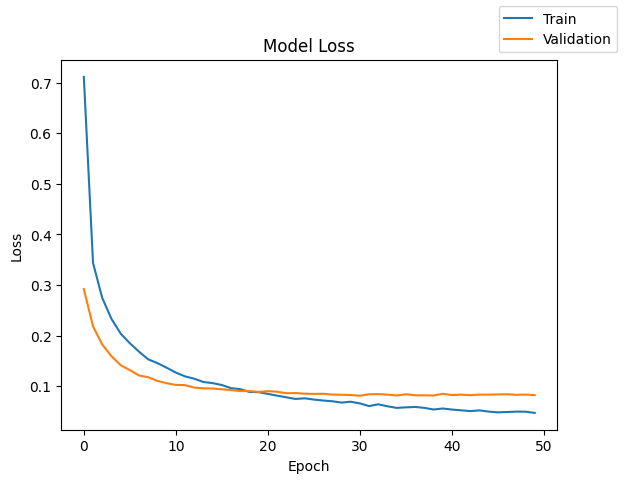

In [ ]:
plot(history,'loss')

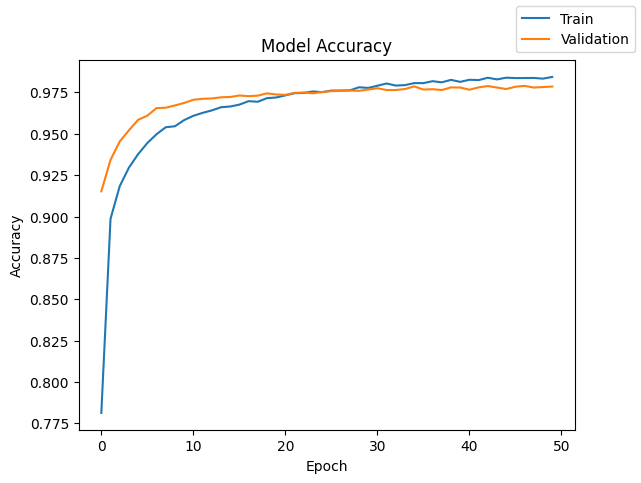

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[12] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier",["batch norm", "dropout (0.3)"],history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.387949,0.389443,0.89588,0.8946,170.59
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.389483,1.391400,0.71824,0.7162,202.39
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.002319,0.137696,0.99938,0.9771,202.56
6,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,-,0.001015,0.118252,0.99990,0.9761,202.55
7,2,"[128, 64]","[relu, tanh]",50,32,adam,"[1e-05, -]",xavier,-,0.116973,0.144575,0.96724,0.9573,262.55
8,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,dropout (0.2),0.016497,0.085363,0.99526,0.9772,202.72
9,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,dropout (0.3),0.029679,0.078168,0.99052,0.9797,183.29


- We don't observe much of an improvement.

- We'll skip Batch Normalization and use only Dropout ahead.

- So far, we have used the Xavier initialization technique to initialize the model's weights.

- We noticed previously how the initial learning rate played a role in the model's performance.

- Another weight initialization technique is He initialization, which works better with ReLU activation.

Let's try using the He initialization for the dense layer with ReLU activation.

### Model 13

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
dropout_rate = 0.3

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = x_train.shape[1],kernel_initializer='he_normal'))
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
start = time.time()
history = model_1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.7811 - accuracy: 0.7867 - val_loss: 0.3464 - val_accuracy: 0.9064
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3423 - accuracy: 0.9035 - val_loss: 0.2478 - val_accuracy: 0.9299
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2642 - accuracy: 0.9242 - val_loss: 0.2053 - val_accuracy: 0.9402
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2224 - accuracy: 0.9353 - val_loss: 0.1756 - val_accuracy: 0.9488
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1928 - accuracy: 0.9435 - val_loss: 0.1570 - val_accuracy: 0.9547
Epoch 6/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1710 - accuracy: 0.9492 - val_loss: 0.1428 - val_accuracy: 0.9589
Epoch 7/50
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1559 - accuracy: 0.9533 - val_loss: 0.1324 - val_accuracy:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  202.86543536186218


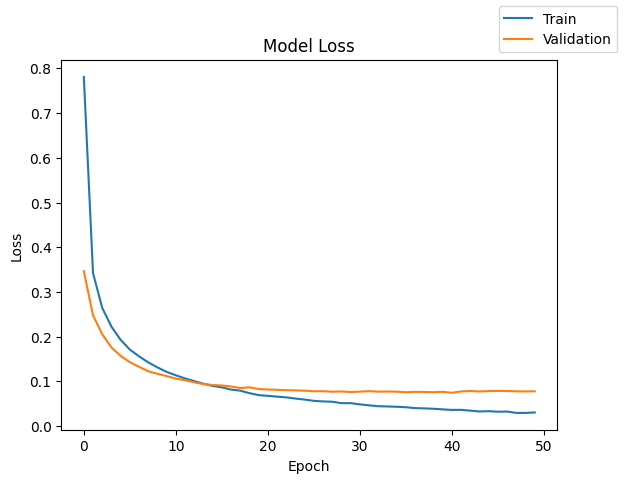

In [ ]:
plot(history,'loss')

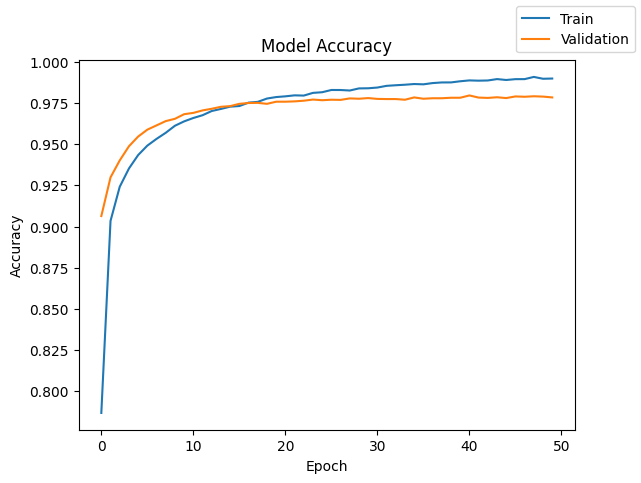

In [ ]:
plot(history,'accuracy')

In [ ]:
results.loc[13] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],["he", "xavier"],"dropout (0.3)",history.history["loss"][-1],history.history["val_loss"][-1],history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train accuracy,validation accuracy,time (secs)
0,2,"[128, 64]","[relu, relu]",50,32,sgd,"[0.001, -]",xavier,-,0.018637,0.084079,0.99722,0.9756,202.60
1,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.9]",xavier,-,0.000368,0.095337,1.00000,0.9801,202.48
2,2,"[128, 64]","[relu, relu]",50,32,sgd with momentum,"[0.001, 0.4]",xavier,-,0.006681,0.077539,0.99968,0.9788,168.63
3,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[0.0001, 0.4]",xavier,-,0.387949,0.389443,0.89588,0.8946,170.59
4,2,"[128, 64]","[relu, tanh]",50,32,sgd with momentum,"[1e-05, 0.4]",xavier,-,1.389483,1.391400,0.71824,0.7162,202.39
5,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.001, -]",xavier,-,0.002319,0.137696,0.99938,0.9771,202.56
6,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,-,0.001015,0.118252,0.99990,0.9761,202.55
7,2,"[128, 64]","[relu, tanh]",50,32,adam,"[1e-05, -]",xavier,-,0.116973,0.144575,0.96724,0.9573,262.55
8,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,dropout (0.2),0.016497,0.085363,0.99526,0.9772,202.72
9,2,"[128, 64]","[relu, tanh]",50,32,adam,"[0.0001, -]",xavier,dropout (0.3),0.029679,0.078168,0.99052,0.9797,183.29


- We don't observe much of an improvement.

## Conclusions

1. **Baseline Model Performance:**
    - A baseline model with two hidden layers having ReLU and tanh activations, using stochastic gradient descent with a batch size of 32, and run for 50 epochs, yielded good overall results (99.7% train accuracy and 97.6% validation accuracy).
    - We observed initial rapid improvement in loss and accuracy, followed by divergence between the training and validation sets after the initial few epochs.

2. **Effect of Momentum**:
    - Introduction of momentum leads to a quicker decrease in loss.
    - However, higher values of momentum may result in the model oscillating around the minimum.

3. **Effect of Learning Rate**:
    - A lower learning rate (1e-4) reduces the oscillations in loss and yields a more generalized performance.
    - However, using even lower learning rates (like 1e-5) would require more epochs for the model to yield desirable results.

4. **Adam vs SGD with Momentum**:
    - The use of Adam helps in tackling the problems listed above, and with the right learning rate, Adam shows improved convergence.
    - Further reduction of the learning rate for Adam (1e-5) leads to smoother convergence but slower model training.

5. **Effect of Regularization**:
    - Dropout with lower ratios (20%) shows no major improvement, but increasing the dropout rate (30%, 50%) reduces overfitting.
    - The use of batch normalization yields slightly lower performance than dropout.
    - The combination of dropout and batch normalization shows no major improvement compared to dropout with a moderate ratio (30%).

6. **Effect of Weight Initialization**:
    - Using weight initialization techniques that are preferable for certain activation functions (like ReLU) does not yield any major performance gain.

**Note**: While the above points offer certain directions regarding how to update the configuration of a neural network for better results, one needs to experiment with different configurations and find the best model through trial and error in real-world scenarios.

<font size=6 color='blue'>Power Ahead</font>
___